In [1]:
#importing libraries
import pandas as pd # for data manipulation and analysis
import numpy as np # for numerical computation
import matplotlib.pyplot as plt # for visualisation
import seaborn as sns # for visualation

from sklearn.preprocessing import (
    OneHotEncoder, # for encoding data
    MinMaxScaler, # for normalisation
    LabelEncoder, # for encoding the data
)
from sklearn.model_selection import train_test_split # for splitting the data
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import( accuracy_score,precision_score,recall_score,f1_score,confusion_matrix,roc_curve,roc_auc_score)

In [2]:
# Modeling
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor

from sklearn.linear_model import (LinearRegression,Ridge,Lasso)
from sklearn.model_selection import(train_test_split,RandomizedSearchCV,cross_val_score)

In [3]:
# Ignore warnings
import warnings
warnings.filterwarnings("ignore")

In [4]:
traffic_df = pd.read_csv('/content/TrafficTwoMonth.csv')
traffic_df.head()

,Time,Date,Day of the week,CarCount,BikeCount,BusCount,TruckCount,Total,Traffic Situation
0,12:00:00 AM,10,Tuesday,13,2,2,24,41,normal
1,12:15:00 AM,10,Tuesday,14,1,1,36,52,low
2,12:30:00 AM,10,Tuesday,10,2,2,32,46,normal
3,12:45:00 AM,10,Tuesday,10,2,2,36,50,normal
4,01:00:00 AM,10,Tuesday,11,2,1,34,48,normal


In [5]:
traffic_df.describe()

,Date,CarCount,BikeCount,BusCount,TruckCount,Total
count,3599.000000,3599.000000,3599.000000,3599.000000,3599.000000,3599.000000
mean,15.438177,63.304251,10.397888,11.370659,20.661017,105.733815
std,8.263921,43.879503,10.302596,10.873106,10.732542,52.896710
min,1.000000,5.000000,0.000000,0.000000,0.000000,23.000000
25%,10.000000,16.500000,2.000000,2.000000,12.000000,53.000000
50%,14.000000,61.000000,8.000000,9.000000,20.000000,101.000000
75%,22.000000,100.000000,16.000000,18.000000,29.000000,147.000000
max,31.000000,179.000000,70.000000,50.000000,60.000000,278.000000


In [6]:
traffic_df.columns

Index(['Time', 'Date', 'Day of the week', 'CarCount', 'BikeCount', 'BusCount',
       'TruckCount', 'Total', 'Traffic Situation'],
      dtype='object')

In [7]:
traffic_df.dtypes

Time                 object
Date                  int64
Day of the week      object
CarCount              int64
BikeCount             int64
BusCount              int64
TruckCount            int64
Total                 int64
Traffic Situation    object
dtype: object

In [8]:
df_complete = traffic_df.copy()
df_1d = traffic_df.head(96) # it need in EDA latter!
df_1d

,Time,Date,Day of the week,CarCount,BikeCount,BusCount,TruckCount,Total,Traffic Situation
0,12:00:00 AM,10,Tuesday,13,2,2,24,41,normal
1,12:15:00 AM,10,Tuesday,14,1,1,36,52,low
2,12:30:00 AM,10,Tuesday,10,2,2,32,46,normal
3,12:45:00 AM,10,Tuesday,10,2,2,36,50,normal
4,01:00:00 AM,10,Tuesday,11,2,1,34,48,normal
...,...,...,...,...,...,...,...,...,...
91,10:45:00 PM,10,Tuesday,11,0,1,33,45,normal
92,11:00:00 PM,10,Tuesday,11,2,2,40,55,low
93,11:15:00 PM,10,Tuesday,11,1,0,31,43,normal
94,11:30:00 PM,10,Tuesday,9,2,1,20,32,normal


In [9]:
traffic_df['midday'] = ''

for i in range(len(traffic_df['Time'])):

    if traffic_df['Time'][i][-2:] == 'AM':
        traffic_df.loc[i, 'midday'] = 'AM'

    elif traffic_df['Time'][i][-2:] == 'PM':
        traffic_df.loc[i, 'midday'] = 'PM'

# removing 'AM' or 'PM' form Time column
traffic_df['Time'] = traffic_df['Time'].str[:-2]

In [10]:
traffic_df

,Time,Date,Day of the week,CarCount,BikeCount,BusCount,TruckCount,Total,Traffic Situation,midday
0,12:00:00,10,Tuesday,13,2,2,24,41,normal,AM
1,12:15:00,10,Tuesday,14,1,1,36,52,low,AM
2,12:30:00,10,Tuesday,10,2,2,32,46,normal,AM
3,12:45:00,10,Tuesday,10,2,2,36,50,normal,AM
4,01:00:00,10,Tuesday,11,2,1,34,48,normal,AM
...,...,...,...,...,...,...,...,...,...,...
3594,10:15:00,16,Monday,15,10,23,20,68,low,AM
3595,10:30:00,16,Monday,37,18,8,16,79,low,AM
3596,10:45:00,16,Monday,10,7,5,14,36,low,AM
3597,11:00:00,16,Monday,54,6,15,23,98,low,AM


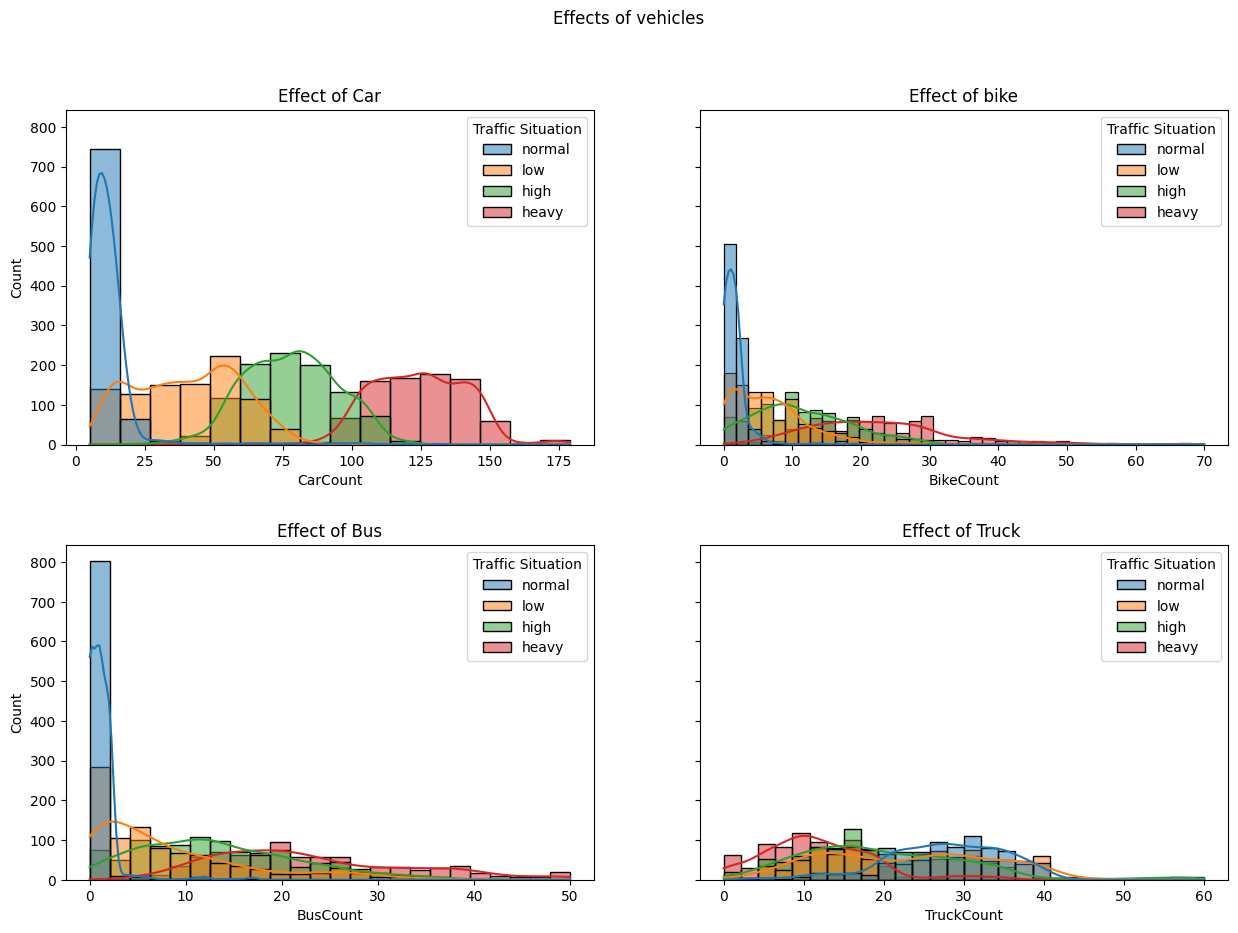

In [11]:
fig, axes = plt.subplots(2, 2, figsize=(15, 10), sharey=True)
fig.suptitle('Effects of vehicles')
# ------------- First-plot(1,1)
sns.histplot(traffic_df,x='CarCount',hue='Traffic Situation',kde=True,ax=axes[0,0])
axes[0,0].set_title('Effect of Car')
# ------------- Second-plot(1,2)
sns.histplot(traffic_df,x='BikeCount',hue='Traffic Situation',kde=True,ax=axes[0,1])
axes[0,1].set_title('Effect of bike')
# ------------- Third-plot(2,1)
sns.histplot(traffic_df,x='BusCount',hue='Traffic Situation',kde=True,ax=axes[1,0])
axes[1,0].set_title('Effect of Bus')
# ------------ Forth-plot(2,2)
sns.histplot(traffic_df,x='TruckCount',hue='Traffic Situation',kde=True,ax=axes[1,1])
axes[1,1].set_title('Effect of Truck ')
plt.subplots_adjust(hspace=0.3)
plt.show()


In [12]:
hours = ['12:00','','','','1:00','','','','2:00','','','','3:00','','','','4:00','','','','5:00','','','','6:00','','','','7:00','','','','8:00','','','','9:00','','','','10:00','','','','11:00']

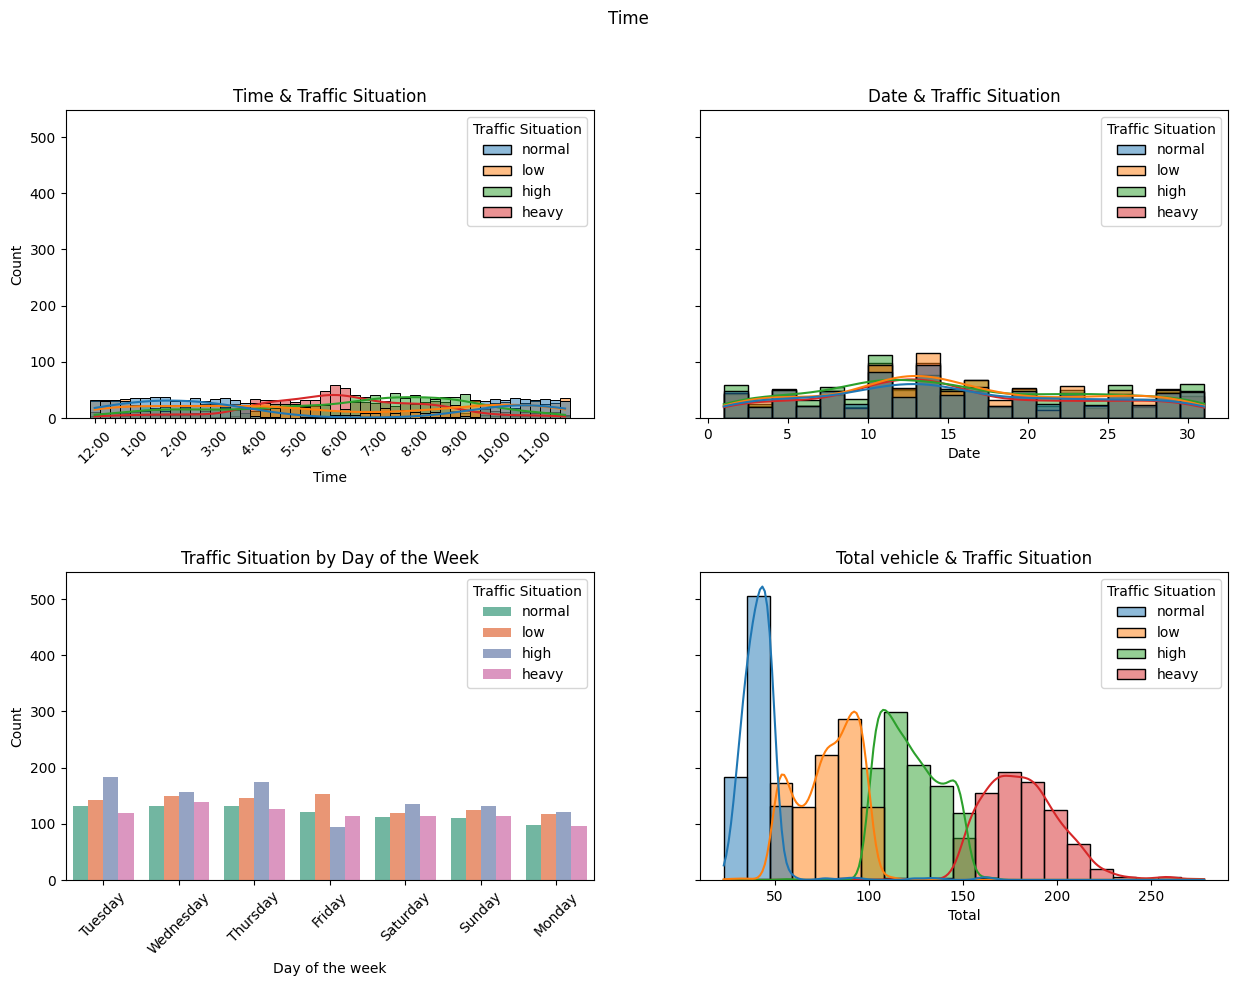

In [13]:
fig, axes = plt.subplots(2, 2, figsize=(15, 10), sharey=True)
fig.suptitle('Time')

sns.histplot(traffic_df, x='Time', hue='Traffic Situation', kde=True, ax=axes[0, 0])
axes[0, 0].set_title('Time & Traffic Situation')
axes[0, 0].set_xticklabels(hours, rotation=45)

sns.histplot(traffic_df, x='Date', hue='Traffic Situation', kde=True, ax=axes[0, 1])
axes[0, 1].set_title('Date & Traffic Situation')

sns.countplot(data=traffic_df, x="Day of the week", hue="Traffic Situation", palette="Set2", ax=axes[1, 0])
axes[1, 0].set_xlabel("Day of the week")
axes[1, 0].set_ylabel("Count")
axes[1, 0].set_title("Traffic Situation by Day of the Week")
# Set the tick positions and labels
tick_positions = range(len(traffic_df['Day of the week'].unique()))
tick_labels = traffic_df['Day of the week'].unique()

# Set the tick positions and labels on the x-axis
axes[1, 0].set_xticks(tick_positions)
axes[1, 0].set_xticklabels(tick_labels, rotation=45)
# axes[1, 0].set_xticklabels(traffic_df['Day of the week'], rotation=45)

sns.histplot(traffic_df, x='Total', hue='Traffic Situation', kde=True, ax=axes[1, 1])
axes[1, 1].set_title('Total vehicle & Traffic Situation')

plt.subplots_adjust(hspace=0.5)
plt.show()

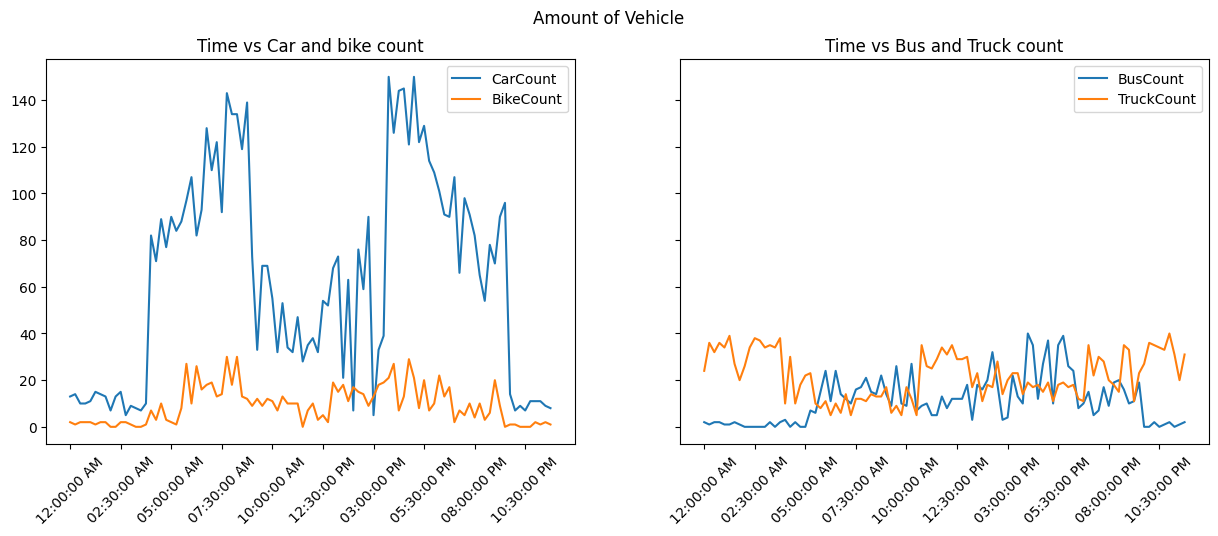

In [14]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5), sharey=True)
fig.suptitle('Amount of Vehicle')
# -------------- First Plot (1,1)
axes[0].plot(df_1d['Time'], df_1d['CarCount'])
axes[0].plot(df_1d['Time'], df_1d['BikeCount'])
axes[0].legend(df_complete.columns[3:5])
axes[0].set_title('Time vs Car and bike count')
axes[0].set_xticks(df_1d['Time'][::10])  # Display every 10th label
axes[0].set_xticklabels(df_1d['Time'][::10], rotation=45)

# ------------- Second Plot (1,2)
axes[1].plot(df_1d['Time'], df_1d['BusCount'])
axes[1].plot(df_1d['Time'], df_1d['TruckCount'])
axes[1].set_title('Time vs Bus and Truck count')
axes[1].legend(df_complete.columns[5:7])
axes[1].set_xticks(df_1d['Time'][::10])  # Display every 10th label
axes[1].set_xticklabels(df_1d['Time'][::10], rotation=45)

plt.show()

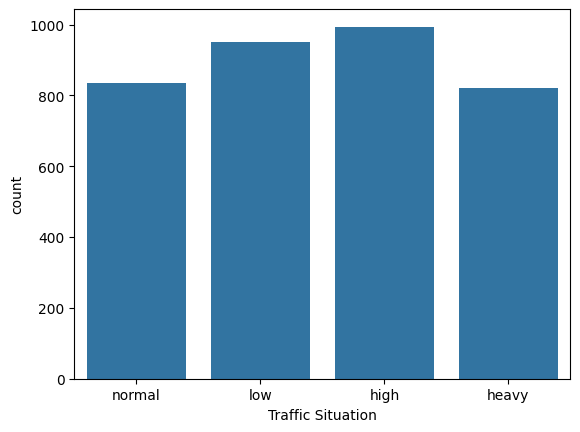

In [15]:
sns.countplot(x='Traffic Situation', data=traffic_df)
plt.show()

In [16]:
# Assuming 'Time' is the name of the column in your DataFrame
traffic_df['Time'] = pd.to_datetime(traffic_df['Time']).dt.hour * 3600 + \
                     pd.to_datetime(traffic_df['Time']).dt.minute * 60 + \
                     pd.to_datetime(traffic_df['Time']).dt.second
traffic_df.head()

,Time,Date,Day of the week,CarCount,BikeCount,BusCount,TruckCount,Total,Traffic Situation,midday
0,43200,10,Tuesday,13,2,2,24,41,normal,AM
1,44100,10,Tuesday,14,1,1,36,52,low,AM
2,45000,10,Tuesday,10,2,2,32,46,normal,AM
3,45900,10,Tuesday,10,2,2,36,50,normal,AM
4,3600,10,Tuesday,11,2,1,34,48,normal,AM


In [17]:
traffic_df['Traffic Situation'].value_counts()

high      994
low       950
normal    834
heavy     821
Name: Traffic Situation, dtype: int64

In [18]:
# Separate the features and target variable
features = traffic_df.drop(['Traffic Situation'], axis=1)
target = traffic_df['Traffic Situation']

In [19]:
# Normalize the numeric features using MinMaxScaler
numeric_columns = ['Time', 'Date', 'CarCount', 'BikeCount', 'BusCount', 'TruckCount', 'Total']
scaler = MinMaxScaler()
features[numeric_columns] = scaler.fit_transform(features[numeric_columns])

In [20]:
# Encode the categorical feature 'midday' using LabelEncoder
le = LabelEncoder()
features['midday'] = le.fit_transform(features['midday'])
features['Day of the week'] = le.fit_transform(features['Day of the week'])

# Encode the target variable 'Traffic Situation' using LabelEncoder
le_target = LabelEncoder()
target = le_target.fit_transform(target)

In [21]:
# Concatenate the features and target variable
normalized_encoded_data = pd.concat([features, pd.Series(target, name='Traffic Situation')], axis=1)

In [22]:
traffic_df = normalized_encoded_data
traffic_df

,Time,Date,Day of the week,CarCount,BikeCount,BusCount,TruckCount,Total,midday,Traffic Situation
0,0.936170,0.3,5,0.045977,0.028571,0.04,0.400000,0.070588,0,3
1,0.957447,0.3,5,0.051724,0.014286,0.02,0.600000,0.113725,0,2
2,0.978723,0.3,5,0.028736,0.028571,0.04,0.533333,0.090196,0,3
3,1.000000,0.3,5,0.028736,0.028571,0.04,0.600000,0.105882,0,3
4,0.000000,0.3,5,0.034483,0.028571,0.02,0.566667,0.098039,0,3
...,...,...,...,...,...,...,...,...,...,...
3594,0.787234,0.5,1,0.057471,0.142857,0.46,0.333333,0.176471,0,2
3595,0.808511,0.5,1,0.183908,0.257143,0.16,0.266667,0.219608,0,2
3596,0.829787,0.5,1,0.028736,0.100000,0.10,0.233333,0.050980,0,2
3597,0.851064,0.5,1,0.281609,0.085714,0.30,0.383333,0.294118,0,2


In [23]:
#Spliting The Dataset to Train and Test
X = traffic_df.drop('Traffic Situation', axis=1)
y = traffic_df['Traffic Situation']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.values.shape


((2879, 9), (720, 9), (2879,), (720,))

In [24]:
X_train

,Time,Date,Day of the week,CarCount,BikeCount,BusCount,TruckCount,Total,midday
2132,0.340426,0.000000,6,0.310345,0.028571,0.00,0.200000,0.196078,0
2382,0.553191,0.066667,0,0.120690,0.028571,0.08,0.583333,0.172549,1
1615,0.574468,0.833333,4,0.431034,0.242857,0.22,0.283333,0.400000,1
3310,0.872340,0.400000,0,0.735632,0.800000,0.50,0.033333,0.756863,0
1128,0.425532,0.666667,2,0.741379,0.071429,0.54,0.250000,0.619608,1
...,...,...,...,...,...,...,...,...,...
1130,0.468085,0.666667,2,0.362069,0.285714,0.18,0.366667,0.376471,1
1294,0.893617,0.733333,1,0.270115,0.028571,0.10,0.483333,0.254902,0
860,0.851064,0.566667,6,0.011494,0.000000,0.04,0.583333,0.082353,1
3507,0.978723,0.466667,3,0.247126,0.114286,0.30,0.383333,0.278431,1


In [25]:
y_train

2132    2
2382    2
1615    1
3310    0
1128    0
       ..
1130    1
1294    2
860     3
3507    2
3174    3
Name: Traffic Situation, Length: 2879, dtype: int64

In [26]:
# Initial models test

In [27]:
init_models = {
    'support vector linear' : SVR(kernel='linear'),
    'support vector kernel' : SVR(kernel= 'rbf'),
    'XGBOOST':XGBRegressor(),
    'Decision Tree' : DecisionTreeRegressor(),
    'Random Forest' : RandomForestRegressor(),
    'LGBM' : LGBMRegressor()
}

In [28]:
R2 = []
models_names = []
for i,(key,model) in enumerate(init_models.items()):
    model.fit(X_train,y_train)
    models_names.append(key)
    R2.append(np.mean(cross_val_score(model,X_train,y_train,cv=5)))
models_scores = pd.DataFrame({'model name':models_names,'R2 score':R2})
models_scores.head(7)


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000356 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 588
[LightGBM] [Info] Number of data points in the train set: 2879, number of used features: 9
[LightGBM] [Info] Start training from score 1.491490
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000447 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 580
[LightGBM] [Info] Number of data points in the train set: 2303, number of used features: 9
[LightGBM] [Info] Start training from score 1.488059
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Fo

,model name,R2 score
0,support vector linear,0.887589
1,support vector kernel,0.904913
2,XGBOOST,0.968633
3,Decision Tree,0.941290
4,Random Forest,0.970914
5,LGBM,0.973572


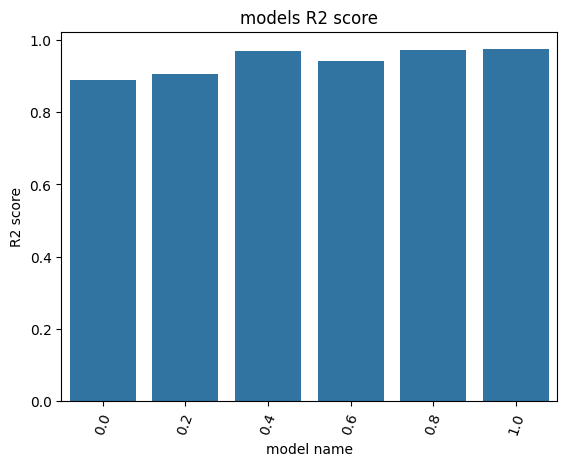

In [29]:
# Plotting
fig, ax = plt.subplots()
ax.set_xticklabels(ax.get_xticklabels(), rotation=70)
ax.set_title("models R2 score")
sns.barplot(data=models_scores, x='model name', y="R2 score")
plt.show()

In [30]:
precision = []
models_names = []
for i,(key,model) in enumerate(init_models.items()):
    model.fit(X_train,y_train)
    models_names.append(key)
    precision.append(np.mean(cross_val_score(model,X_train,y_train,cv=5)))
models_scores = pd.DataFrame({'model name':models_names,'precision':precision})
models_scores.head(7)

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000116 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 588
[LightGBM] [Info] Number of data points in the train set: 2879, number of used features: 9
[LightGBM] [Info] Start training from score 1.491490
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000450 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 580
[LightGBM] [Info] Number of data points in the train set: 2303, number of used features: 9
[LightGBM] [Info] Start training from score 1.488059
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Fo

,model name,precision
0,support vector linear,0.887589
1,support vector kernel,0.904913
2,XGBOOST,0.968633
3,Decision Tree,0.934594
4,Random Forest,0.971087
5,LGBM,0.973572


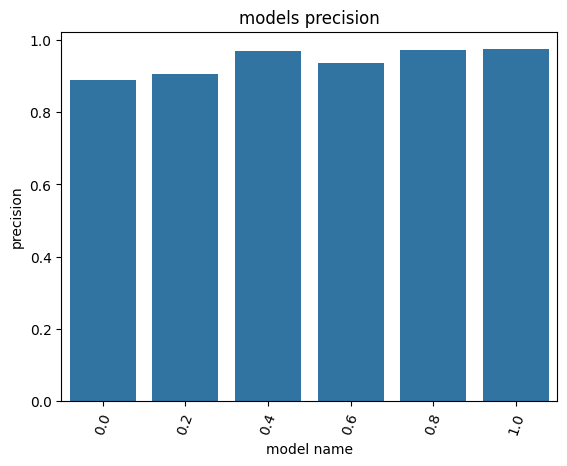

In [31]:
# Plotting
fig, ax = plt.subplots()
ax.set_xticklabels(ax.get_xticklabels(), rotation=70)
ax.set_title("models precision")
sns.barplot(data=models_scores, x='model name', y="precision")
plt.show()

In [32]:
Recall = []
models_names = []
for i,(key,model) in enumerate(init_models.items()):
    model.fit(X_train,y_train)
    models_names.append(key)
    Recall.append(np.mean(cross_val_score(model,X_train,y_train,cv=5)))
models_scores = pd.DataFrame({'model name':models_names,'Recall':Recall})
models_scores.head(7)

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000531 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 588
[LightGBM] [Info] Number of data points in the train set: 2879, number of used features: 9
[LightGBM] [Info] Start training from score 1.491490
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000442 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 580
[LightGBM] [Info] Number of data points in the train set: 2303, number of used features: 9
[LightGBM] [Info] Start training from score 1.488059
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightG

,model name,Recall
0,support vector linear,0.887589
1,support vector kernel,0.904913
2,XGBOOST,0.968633
3,Decision Tree,0.932583
4,Random Forest,0.971145
5,LGBM,0.973572


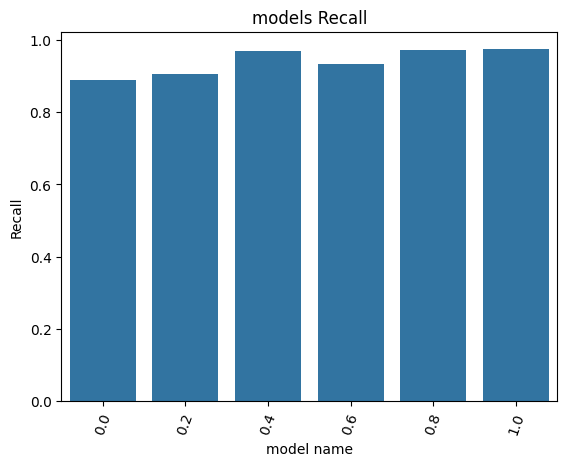

In [33]:
# Plotting
fig, ax = plt.subplots()
ax.set_xticklabels(ax.get_xticklabels(), rotation=70)
ax.set_title("models Recall")
sns.barplot(data=models_scores, x='model name', y="Recall")
plt.show()

In [34]:
f1_score = []
models_names = []
for i,(key,model) in enumerate(init_models.items()):
    model.fit(X_train,y_train)
    models_names.append(key)
    f1_score.append(np.mean(cross_val_score(model,X_train,y_train,cv=5)))
models_scores = pd.DataFrame({'model name':models_names,'f1_score':f1_score})
models_scores.head(7)

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000358 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 588
[LightGBM] [Info] Number of data points in the train set: 2879, number of used features: 9
[LightGBM] [Info] Start training from score 1.491490
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000430 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 580
[LightGBM] [Info] Number of data points in the train set: 2303, number of used features: 9
[LightGBM] [Info] Start training from score 1.488059
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightG

,model name,f1_score
0,support vector linear,0.887589
1,support vector kernel,0.904913
2,XGBOOST,0.968633
3,Decision Tree,0.931447
4,Random Forest,0.970849
5,LGBM,0.973572


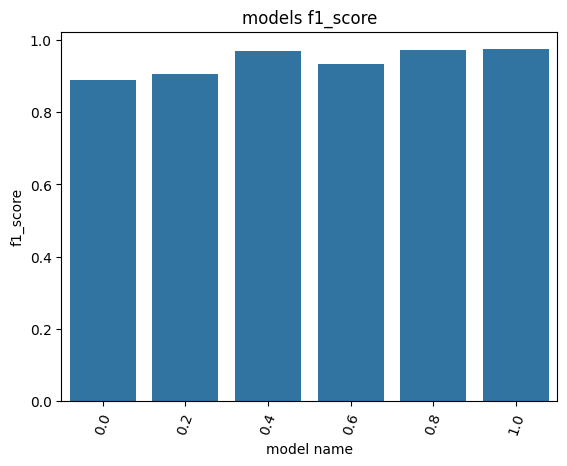

In [35]:
# Plotting
fig, ax = plt.subplots()
ax.set_xticklabels(ax.get_xticklabels(), rotation=70)
ax.set_title("models f1_score")
sns.barplot(data=models_scores, x='model name', y="f1_score")
plt.show()

In [36]:
model = SVR(kernel='linear')
model.fit(X_train, y_train)

SVR(kernel='linear')

In [37]:
y_pred=model.predict(X_test)
y_pred_rounded = [int(round(pred)) for pred in y_pred]
y_test, y_pred_rounded

(1339    3
 1600    0
 2213    3
 2852    1
 211     1
        ..
 3526    0
 2499    3
 1041    2
 2069    1
 288     3
 Name: Traffic Situation, Length: 720, dtype: int64,
 [3,
  0,
  3,
  1,
  1,
  2,
  3,
  2,
  1,
  3,
  3,
  1,
  1,
  0,
  2,
  2,
  3,
  3,
  1,
  2,
  3,
  3,
  3,
  -1,
  2,
  1,
  0,
  3,
  1,
  0,
  2,
  2,
  2,
  3,
  0,
  1,
  1,
  0,
  2,
  0,
  1,
  2,
  3,
  1,
  1,
  2,
  3,
  1,
  3,
  2,
  0,
  1,
  3,
  3,
  3,
  2,
  2,
  2,
  0,
  2,
  3,
  2,
  3,
  0,
  3,
  3,
  2,
  2,
  1,
  3,
  1,
  3,
  1,
  1,
  2,
  0,
  2,
  3,
  0,
  2,
  0,
  2,
  1,
  0,
  3,
  1,
  1,
  1,
  3,
  2,
  0,
  3,
  1,
  -1,
  0,
  2,
  1,
  0,
  1,
  3,
  3,
  0,
  3,
  3,
  3,
  1,
  -1,
  1,
  1,
  1,
  0,
  2,
  3,
  1,
  1,
  2,
  2,
  -1,
  2,
  2,
  0,
  2,
  3,
  1,
  3,
  2,
  3,
  3,
  3,
  2,
  2,
  2,
  3,
  1,
  2,
  1,
  1,
  2,
  2,
  1,
  3,
  3,
  3,
  2,
  3,
  2,
  3,
  1,
  2,
  2,
  3,
  2,
  3,
  1,
  2,
  2,
  3,
  3,
  2,
  1,
  2,
  3,
  2,
  3,
  

In [38]:
svr_accuracy = accuracy_score(y_test, y_pred_rounded)
precision = precision_score(y_test, y_pred_rounded, average='weighted')
recall = recall_score(y_test, y_pred_rounded, average='weighted')
print(f'Accuracy: {svr_accuracy}')
print(f'precision: {precision}')
print(f'recall: {recall}')


Accuracy: 0.8472222222222222
precision: 0.8791722656954257
recall: 0.8472222222222222


In [39]:
cm = confusion_matrix(y_test, y_pred_rounded)
cm

array([[  0,   0,   0,   0,   0],
       [ 19, 118,  18,   0,   0],
       [  0,   0, 167,  39,   0],
       [  0,   0,   1, 149,  31],
       [  0,   0,   1,   1, 176]])

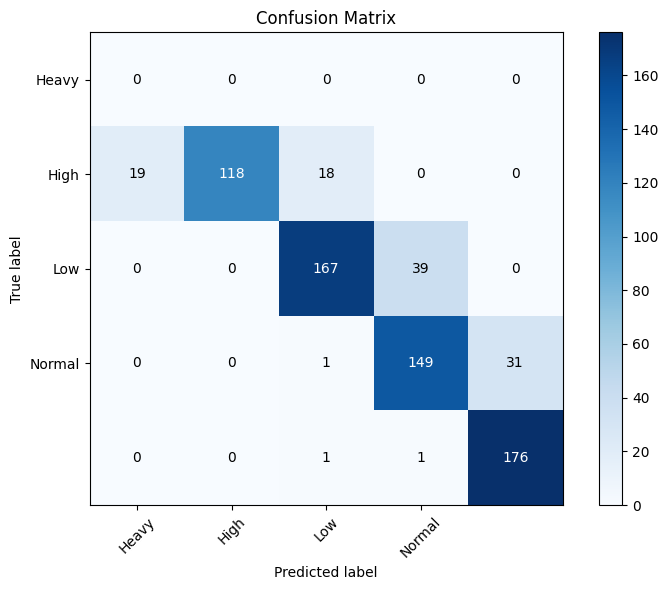

In [40]:
def plot_confusion_matrix(confusion_matrix, classes):

    plt.imshow(confusion_matrix, interpolation='nearest', cmap=plt.cm.Blues)
    plt.title('Confusion Matrix')
    plt.colorbar()

    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = 'd'
    thresh = confusion_matrix.max() / 2.
    for i in range(confusion_matrix.shape[0]):
        for j in range(confusion_matrix.shape[1]):
            plt.text(j, i, format(confusion_matrix[i, j], fmt),
                     ha="center", va="center",
                     color="white" if confusion_matrix[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

    # Show the plot
plt.figure(figsize=(8, 6))
plot_confusion_matrix(cm, classes=['Heavy', 'High', 'Low', 'Normal'])
plt.show()

In [41]:
model1=SVR(kernel='rbf')
model1.fit(X_train, y_train)

SVR()

In [42]:
y_pred=model1.predict(X_test)
y_pred_rounded = [int(round(pred)) for pred in y_pred]

In [43]:
y_test, y_pred_rounded

(1339    3
 1600    0
 2213    3
 2852    1
 211     1
        ..
 3526    0
 2499    3
 1041    2
 2069    1
 288     3
 Name: Traffic Situation, Length: 720, dtype: int64,
 [3,
  0,
  3,
  1,
  1,
  2,
  3,
  2,
  1,
  3,
  3,
  1,
  0,
  0,
  2,
  2,
  3,
  3,
  1,
  1,
  3,
  3,
  3,
  0,
  2,
  1,
  0,
  3,
  1,
  0,
  2,
  2,
  2,
  3,
  0,
  1,
  1,
  0,
  2,
  0,
  1,
  2,
  3,
  1,
  2,
  2,
  3,
  1,
  3,
  2,
  0,
  1,
  3,
  3,
  3,
  1,
  2,
  1,
  0,
  2,
  3,
  2,
  3,
  0,
  3,
  3,
  2,
  2,
  1,
  3,
  1,
  3,
  1,
  1,
  2,
  0,
  2,
  3,
  0,
  2,
  0,
  2,
  1,
  0,
  3,
  1,
  1,
  1,
  3,
  2,
  0,
  3,
  1,
  0,
  0,
  2,
  1,
  0,
  1,
  3,
  3,
  0,
  3,
  3,
  3,
  0,
  0,
  1,
  1,
  1,
  0,
  2,
  2,
  1,
  1,
  2,
  2,
  0,
  2,
  2,
  0,
  2,
  3,
  1,
  3,
  2,
  3,
  3,
  3,
  1,
  2,
  2,
  3,
  1,
  2,
  1,
  1,
  2,
  2,
  1,
  3,
  3,
  3,
  1,
  3,
  2,
  3,
  1,
  2,
  1,
  3,
  2,
  3,
  1,
  2,
  1,
  3,
  3,
  2,
  1,
  2,
  3,
  2,
  3,
  0,
 

In [44]:
svr_accuracy1 = accuracy_score(y_test, y_pred_rounded)
precision = precision_score(y_test, y_pred_rounded, average='weighted')
recall = recall_score(y_test, y_pred_rounded, average='weighted')
print(f'Accuracy: {svr_accuracy1}')
print(f'precision: {precision}')
print(f'recall: {recall}')

Accuracy: 0.9138888888888889
precision: 0.9176246064395819
recall: 0.9138888888888889


In [45]:
cm = confusion_matrix(y_test, y_pred_rounded)
cm

array([[  0,   0,   0,   0,   0],
       [  1, 142,  12,   0,   0],
       [  0,   1, 189,  16,   0],
       [  0,   0,   4, 151,  26],
       [  0,   0,   1,   1, 176]])

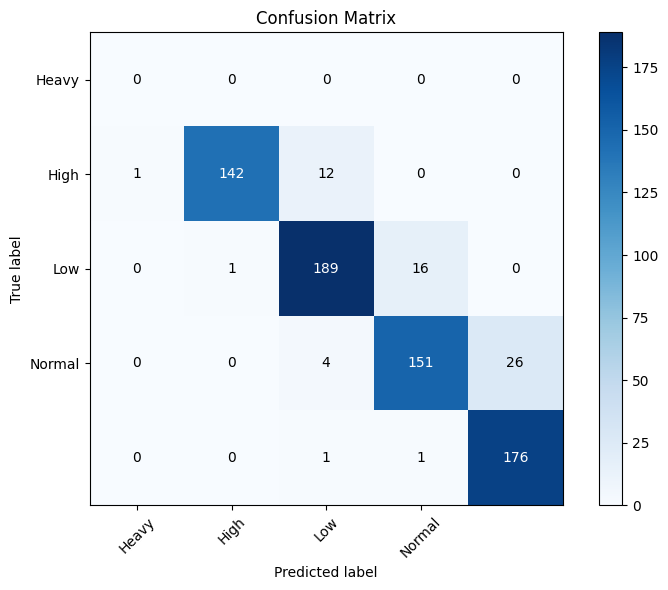

In [46]:
def plot_confusion_matrix(confusion_matrix, classes):

    plt.imshow(confusion_matrix, interpolation='nearest', cmap=plt.cm.Blues)
    plt.title('Confusion Matrix')
    plt.colorbar()

    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = 'd'
    thresh = confusion_matrix.max() / 2.
    for i in range(confusion_matrix.shape[0]):
        for j in range(confusion_matrix.shape[1]):
            plt.text(j, i, format(confusion_matrix[i, j], fmt),
                     ha="center", va="center",
                     color="white" if confusion_matrix[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

    # Show the plot
    plt.show()
plt.figure(figsize=(8, 6))
plot_confusion_matrix(cm, classes=['Heavy', 'High', 'Low', 'Normal'])
plt.show()

In [47]:
modelr = RandomForestRegressor()
modelr.fit(X_train, y_train)

RandomForestRegressor()

In [48]:
y_pred=modelr.predict(X_test)
y_pred_rounded = [int(round(pred)) for pred in y_pred]
y_test, y_pred_rounded

(1339    3
 1600    0
 2213    3
 2852    1
 211     1
        ..
 3526    0
 2499    3
 1041    2
 2069    1
 288     3
 Name: Traffic Situation, Length: 720, dtype: int64,
 [3,
  0,
  3,
  1,
  1,
  2,
  3,
  2,
  1,
  3,
  3,
  1,
  0,
  0,
  2,
  1,
  3,
  3,
  1,
  1,
  3,
  3,
  3,
  0,
  2,
  0,
  0,
  2,
  1,
  0,
  2,
  2,
  2,
  3,
  0,
  1,
  1,
  0,
  2,
  0,
  1,
  2,
  3,
  1,
  1,
  2,
  3,
  1,
  3,
  2,
  0,
  1,
  3,
  3,
  3,
  1,
  2,
  1,
  0,
  2,
  3,
  2,
  3,
  0,
  3,
  3,
  2,
  1,
  1,
  2,
  0,
  3,
  1,
  1,
  2,
  0,
  2,
  3,
  0,
  2,
  0,
  2,
  1,
  0,
  3,
  1,
  1,
  1,
  3,
  2,
  0,
  3,
  0,
  0,
  0,
  2,
  1,
  0,
  1,
  3,
  3,
  0,
  3,
  2,
  3,
  0,
  0,
  1,
  1,
  1,
  0,
  2,
  2,
  1,
  1,
  2,
  2,
  0,
  2,
  2,
  0,
  2,
  3,
  1,
  2,
  2,
  3,
  2,
  3,
  1,
  2,
  2,
  3,
  1,
  2,
  1,
  1,
  2,
  2,
  1,
  3,
  3,
  3,
  1,
  3,
  2,
  3,
  1,
  2,
  2,
  3,
  2,
  3,
  1,
  2,
  1,
  3,
  3,
  2,
  1,
  2,
  3,
  2,
  3,
  0,
 

In [49]:
rf_accuracy = accuracy_score(y_test, y_pred_rounded)
precision = precision_score(y_test, y_pred_rounded, average='weighted')
recall = recall_score(y_test, y_pred_rounded, average='weighted')
print(f'Accuracy: {rf_accuracy}')
print(f'precision: {precision}')
print(f'recall: {recall}')

Accuracy: 0.9833333333333333
precision: 0.9834030067155066
recall: 0.9833333333333333


In [50]:
cm = confusion_matrix(y_test, y_pred_rounded)
cm

array([[153,   2,   0,   0],
       [  3, 203,   0,   0],
       [  0,   2, 178,   1],
       [  0,   1,   3, 174]])

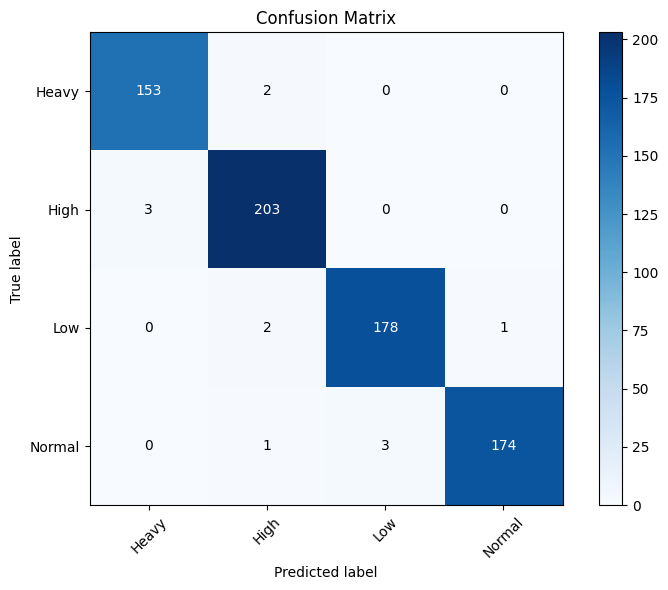

In [51]:
def plot_confusion_matrix(confusion_matrix, classes):

    plt.imshow(confusion_matrix, interpolation='nearest', cmap=plt.cm.Blues)
    plt.title('Confusion Matrix')
    plt.colorbar()

    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = 'd'
    thresh = confusion_matrix.max() / 2.
    for i in range(confusion_matrix.shape[0]):
        for j in range(confusion_matrix.shape[1]):
            plt.text(j, i, format(confusion_matrix[i, j], fmt),
                     ha="center", va="center",
                     color="white" if confusion_matrix[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

    # Show the plot
    plt.show()
plt.figure(figsize=(8, 6))
plot_confusion_matrix(cm, classes=['Heavy', 'High', 'Low', 'Normal'])
plt.show()

In [52]:
modelx=XGBRegressor()
modelx.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [53]:
y_pred=modelx.predict(X_test)
y_pred_rounded = [int(round(pred)) for pred in y_pred]

In [54]:
xgb_accuracy = accuracy_score(y_test, y_pred_rounded)
precision = precision_score(y_test, y_pred_rounded, average='weighted')
recall = recall_score(y_test, y_pred_rounded, average='weighted')
print(f'Accuracy: {xgb_accuracy}')
print(f'precision: {precision}')
print(f'recall: {recall}')

Accuracy: 0.9819444444444444
precision: 0.9820527396580029
recall: 0.9819444444444444


In [55]:
cm = confusion_matrix(y_test, y_pred_rounded)
cm

array([[152,   3,   0,   0],
       [  2, 203,   1,   0],
       [  0,   2, 178,   1],
       [  0,   1,   3, 174]])

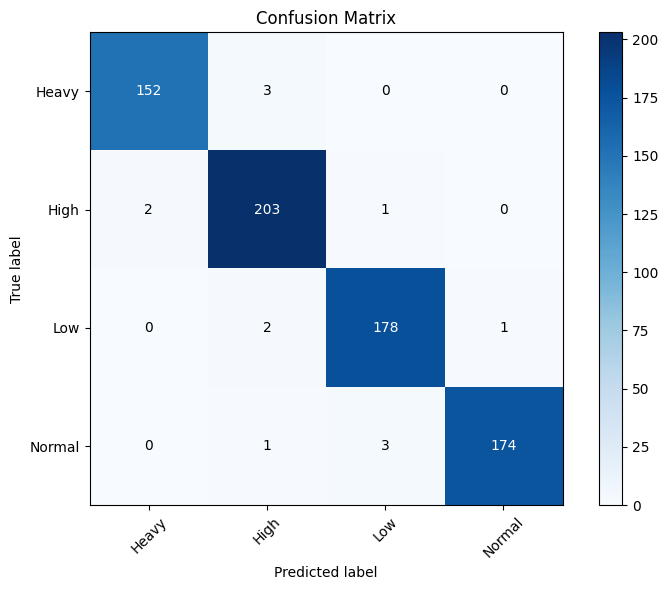

In [56]:
def plot_confusion_matrix(confusion_matrix, classes):
    plt.imshow(confusion_matrix, interpolation='nearest', cmap=plt.cm.Blues)
    plt.title('Confusion Matrix')
    plt.colorbar()

    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = 'd'
    thresh = confusion_matrix.max() / 2.
    for i in range(confusion_matrix.shape[0]):
        for j in range(confusion_matrix.shape[1]):
            plt.text(j, i, format(confusion_matrix[i, j], fmt),
                     ha="center", va="center",
                     color="white" if confusion_matrix[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

    # Show the plot
    plt.show()
plt.figure(figsize=(8, 6))
plot_confusion_matrix(cm, classes=['Heavy', 'High', 'Low', 'Normal'])
plt.show()

In [57]:
modell=LGBMRegressor()
modell.fit(X_train, y_train)

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000503 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 588
[LightGBM] [Info] Number of data points in the train set: 2879, number of used features: 9
[LightGBM] [Info] Start training from score 1.491490


LGBMRegressor()

In [58]:
y_pred=modell.predict(X_test)
y_pred_rounded = [int(round(pred)) for pred in y_pred]

In [59]:
lgbm_accuracy = accuracy_score(y_test, y_pred_rounded)
precision = precision_score(y_test, y_pred_rounded, average='weighted')
recall = recall_score(y_test, y_pred_rounded, average='weighted')
print(f'Accuracy: {lgbm_accuracy}')
print(f'precision: {precision}')
print(f'recall: {recall}')

Accuracy: 0.9833333333333333
precision: 0.9834030067155066
recall: 0.9833333333333333


In [60]:
cm = confusion_matrix(y_test, y_pred_rounded)
cm

array([[153,   2,   0,   0],
       [  3, 203,   0,   0],
       [  0,   2, 178,   1],
       [  0,   1,   3, 174]])

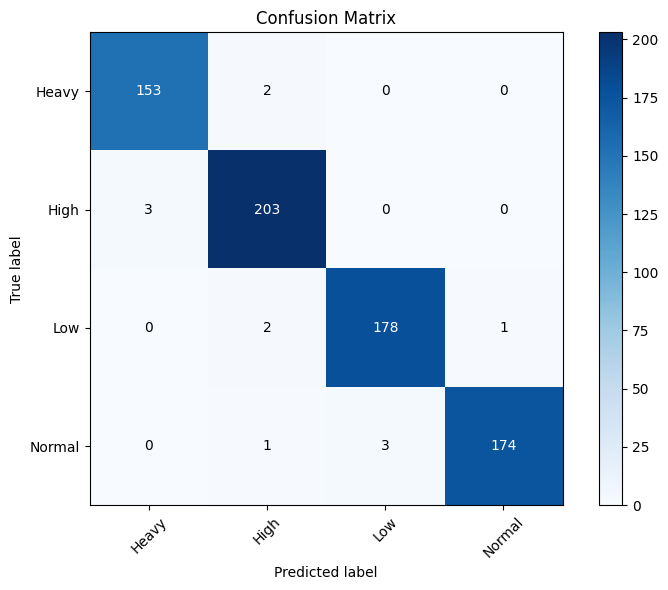

In [61]:
def plot_confusion_matrix(confusion_matrix, classes):

    plt.imshow(confusion_matrix, interpolation='nearest', cmap=plt.cm.Blues)
    plt.title('Confusion Matrix')
    plt.colorbar()

    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = 'd'
    thresh = confusion_matrix.max() / 2.
    for i in range(confusion_matrix.shape[0]):
        for j in range(confusion_matrix.shape[1]):
            plt.text(j, i, format(confusion_matrix[i, j], fmt),
                     ha="center", va="center",
                     color="white" if confusion_matrix[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

    # Show the plot
    plt.show()
plt.figure(figsize=(8, 6))
plot_confusion_matrix(cm, classes=['Heavy', 'High', 'Low', 'Normal'])
plt.show()

In [62]:
modeldt=DecisionTreeRegressor()
modeldt.fit(X_train, y_train)

DecisionTreeRegressor()

In [63]:
y_pred=modeldt.predict(X_test)
y_pred_rounded = [int(round(pred)) for pred in y_pred]

In [64]:
dt_accuracy = accuracy_score(y_test, y_pred_rounded)
precision = precision_score(y_test, y_pred_rounded, average='weighted')
recall = recall_score(y_test, y_pred_rounded, average='weighted')
print(f'Accuracy: {dt_accuracy}')
print(f'precision: {precision}')
print(f'recall: {recall}')

Accuracy: 0.9791666666666666
precision: 0.9791736512075496
recall: 0.9791666666666666


In [65]:
cm = confusion_matrix(y_test, y_pred_rounded)
cm

array([[152,   2,   0,   1],
       [  3, 201,   1,   1],
       [  0,   2, 178,   1],
       [  0,   1,   3, 174]])

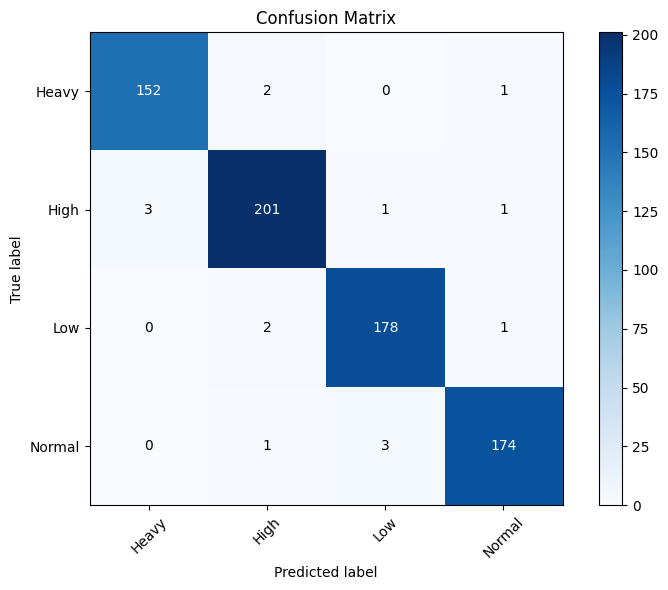

In [66]:
def plot_confusion_matrix(confusion_matrix, classes):

    plt.imshow(confusion_matrix, interpolation='nearest', cmap=plt.cm.Blues)
    plt.title('Confusion Matrix')
    plt.colorbar()

    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = 'd'
    thresh = confusion_matrix.max() / 2.
    for i in range(confusion_matrix.shape[0]):
        for j in range(confusion_matrix.shape[1]):
            plt.text(j, i, format(confusion_matrix[i, j], fmt),
                     ha="center", va="center",
                     color="white" if confusion_matrix[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

    # Show the plot
    plt.show()
plt.figure(figsize=(8, 6))
plot_confusion_matrix(cm, classes=['Heavy', 'High', 'Low', 'Normal'])
plt.show()

In [67]:
X_test

,Time,Date,Day of the week,CarCount,BikeCount,BusCount,TruckCount,Total,midday
1339,0.829787,0.733333,1,0.011494,0.028571,0.02,0.450000,0.054902,1
1600,0.255319,0.833333,4,0.758621,0.285714,0.60,0.250000,0.701961,1
2213,0.021277,0.033333,4,0.045977,0.028571,0.02,0.416667,0.070588,0
2852,0.340426,0.233333,6,0.568966,0.242857,0.24,0.266667,0.494118,1
211,0.319149,0.366667,4,0.454023,0.142857,0.12,0.266667,0.364706,0
...,...,...,...,...,...,...,...,...,...
3526,0.361702,0.466667,3,0.701149,0.514286,0.84,0.150000,0.749020,1
2499,1.000000,0.133333,3,0.051724,0.028571,0.00,0.550000,0.101961,0
1041,0.617021,0.633333,0,0.097701,0.014286,0.08,0.716667,0.184314,1
2069,0.021277,1.000000,5,0.229885,0.185714,0.66,0.450000,0.372549,1


In [68]:
print(f'SVL Accuracy: {svr_accuracy}')
print(f'SVK Accuracy: {svr_accuracy1}')
print(f'Random forest Accuracy: {rf_accuracy}')
print(f'XGB Accuracy: {xgb_accuracy}')
print(f'LGBM Accuracy: {lgbm_accuracy}')
print(f'Decision Tree Accuracy: {dt_accuracy}')

SVL Accuracy: 0.8472222222222222
SVK Accuracy: 0.9138888888888889
Random forest Accuracy: 0.9833333333333333
XGB Accuracy: 0.9819444444444444
LGBM Accuracy: 0.9833333333333333
Decision Tree Accuracy: 0.9791666666666666


Text(0, 0.5, 'Accuracies')

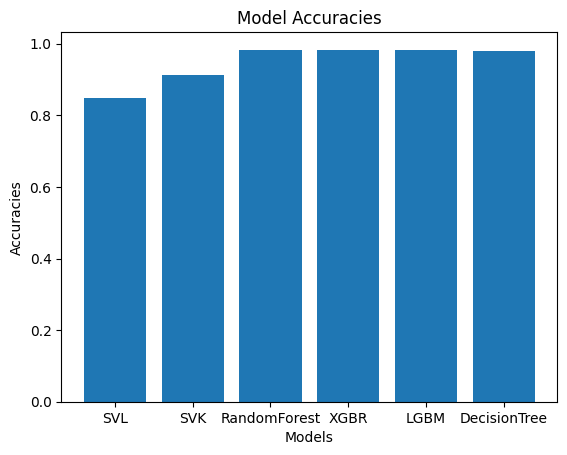

In [69]:
accuracy_list = []
accuracy_list.append(svr_accuracy)
accuracy_list.append(svr_accuracy1)
accuracy_list.append(rf_accuracy)
accuracy_list.append(xgb_accuracy)
accuracy_list.append(lgbm_accuracy)
accuracy_list.append(dt_accuracy)
Model_name=['SVL','SVK','RandomForest','XGBR','LGBM','DecisionTree']
plt.bar(Model_name,accuracy_list)
plt.title("Model Accuracies")
plt.xlabel("Models")
plt.ylabel("Accuracies")